In [1]:
!pip install pandas scikit-learn matplotlib seaborn wordcloud nltk
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import pandas as pd

data = {
    'text': [
        "I love the new healthcare policies!",
        "The hospital staff was rude.",
        "Great experience with telemedicine.",
        "I hate waiting in the ER.",
        "Mental health services are improving!",
        "Healthcare costs are too high.",
        "Doctors were kind and helpful.",
        "I'm unhappy with the medical care.",
        "Fantastic service and support.",
        "This is the worst healthcare system ever."
    ],
    'sentiment': ['positive', 'negative', 'positive', 'negative', 'positive', 'negative',
                  'positive', 'negative', 'positive', 'negative']
}

df = pd.DataFrame(data)
df.head()


,text,sentiment
0,I love the new healthcare policies!,positive
1,The hospital staff was rude.,negative
2,Great experience with telemedicine.,positive
3,I hate waiting in the ER.,negative
4,Mental health services are improving!,positive


In [3]:
import re
from nltk.corpus import stopwords

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuations
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,text,sentiment,clean_text
0,I love the new healthcare policies!,positive,love new healthcare policies
1,The hospital staff was rude.,negative,hospital staff rude
2,Great experience with telemedicine.,positive,great experience telemedicine
3,I hate waiting in the ER.,negative,hate waiting er
4,Mental health services are improving!,positive,mental health services improving


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


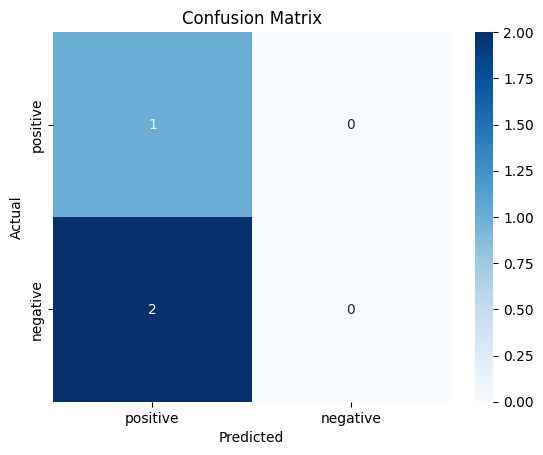

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    return model.predict(vec)[0]

# Test examples
print(predict_sentiment("I'm very happy with the new hospital staff"))
print(predict_sentiment("Healthcare system is a failure"))


positive
negative
